In [1]:
import numpy as np
import pandas as pd
from scipy import special
from matplotlib import pyplot as plt
import ipywidgets as widgets
import tabulate
import tikzmagic
%load_ext tikzmagic

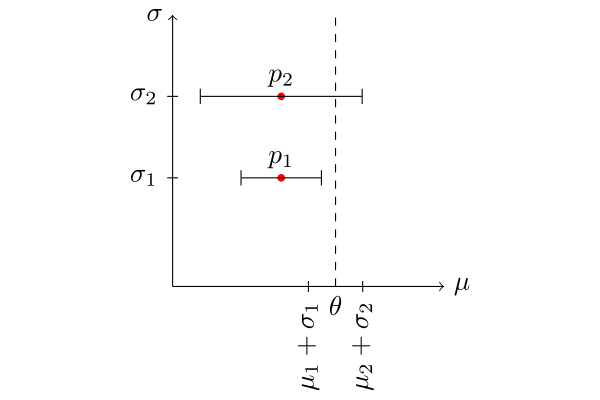

In [17]:
%%tikz -s 600,400 -f svg -l positioning,calc

\draw[->] (0,0) -- (100pt,0) node[anchor=west] {$\mu$};
\draw[->] (0,0) -- (0,100pt) node[anchor=east] {$\sigma$};

\draw[dashed] (60pt,0) node[anchor=north] {$\theta$} -- (60pt, 100pt);

\node[circle,fill=red,red, inner sep=1] (p1) at (40pt,40pt) {};
\node[anchor=south] at (p1) {$p_1$};
\draw[|-|] ($(p1)-(15pt,0)$) -- ($(p1)+(15pt,0)$);
\draw (-2pt,0 |- p1) node[anchor=east] {$\sigma_1$} -- (2pt,0 |- p1);

\draw ($ (0,-2pt -| p1) + (10pt,0) $) node[anchor=east,rotate=90] {$\mu_1 + \sigma_1$} -- ($ (0,2pt -| p1) + (10pt,0) $);

\node[circle,fill=red,red, inner sep=1] (p2) at (40pt,70pt) {};
\node[anchor=south] at (p2) {$p_2$};
\draw[|-|] ($(p2)-(30pt,0)$) -- ($(p2)+(30pt,0)$);
\draw (-2pt,0 |- p2) node[anchor=east] {$\sigma_2$} -- (2pt,0 |- p2);

\draw ($ (0,-2pt -| p2) + (30pt,0) $) node[anchor=east,rotate=90] {$\mu_2 + \sigma_2$} -- ($ (0,2pt -| p2) + (30pt,0) $);


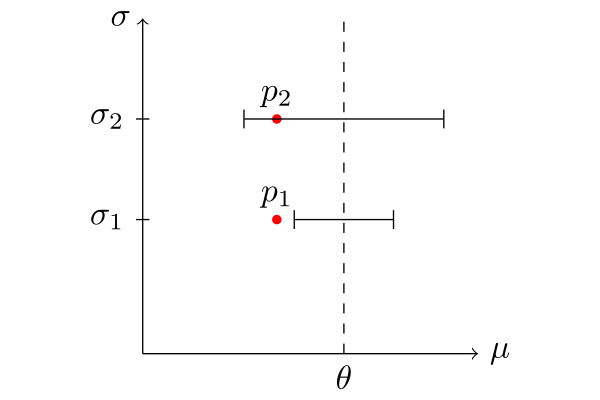

In [16]:
%%tikz -s 600,400 -f svg -l positioning,calc

\draw[->] (0,0) -- (100pt,0) node[anchor=west] {$\mu$};
\draw[->] (0,0) -- (0,100pt) node[anchor=east] {$\sigma$};

\draw[dashed] (60pt,0) node[anchor=north] {$\theta$} -- (60pt, 100pt);

\node[circle,fill=red,red, inner sep=1] (point1) at (40pt,40pt) {};
\node[anchor=south] at (point1) {$p_1$};
\node (p1) at (60pt,40pt) {};
\draw[|-|] ($(p1)-(15pt,0)$) -- ($(p1)+(15pt,0)$);
\draw (-2pt,0 |- p1) node[anchor=east] {$\sigma_1$} -- (2pt,0 |- p1);

\node[circle,fill=red,red, inner sep=1] (point2) at (40pt,70pt) {};
\node[anchor=south] at (point2) {$p_2$};
\node (p2) at (60pt,70pt) {};
\draw[|-|] ($(p2)-(30pt,0)$) -- ($(p2)+(30pt,0)$);
\draw (-2pt,0 |- p2) node[anchor=east] {$\sigma_2$} -- (2pt,0 |- p2);


# Standard deviation

\begin{align}
    p = \mathop{erf}( \frac{z}{ \sqrt{2} } )
\end{align}

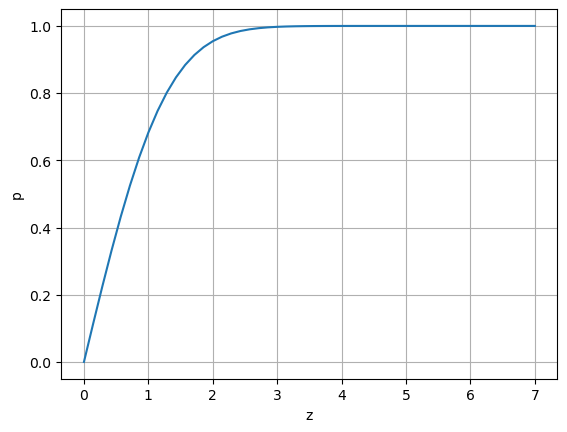

HTML(value='<table>\n<thead>\n<tr><th>Confidence interval  </th><th>Percentage  </th></tr>\n</thead>\n<tbody>\…

In [18]:
z = np.linspace(0, 7)
p = special.erf( z / np.sqrt(2))

plt.figure()
plt.plot(z, p)

plt.xlabel('z')
plt.ylabel('p')

plt.grid()
plt.show()

z = [0.318639, 0.674490, 0.977925, 0.994458, 1, 1.281552, 1.644854, 1.959964, 2, 2.575829, 3]
p = special.erf( z / np.sqrt(2))

z_text = ['{:g} σ'.format(zz) for zz in z]
p_text = ['{:g} %'.format(pp) for pp in p]

display( widgets.HTML(tabulate.tabulate( np.transpose([z_text, p_text]), headers=['Confidence interval', 'Percentage'], tablefmt='html' ) ))

\begin{align}
    z = \sqrt{2} \mathop{erf}^{-1} ( p )
\end{align}

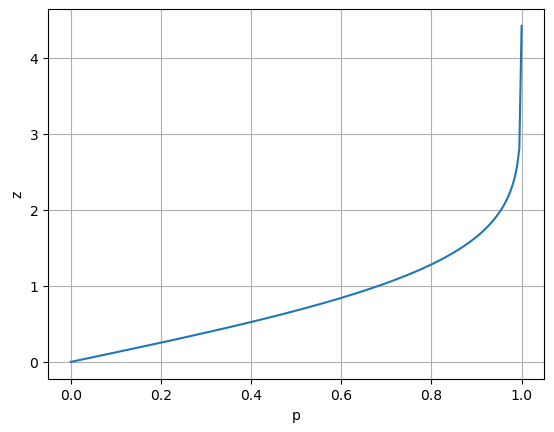

In [19]:
p = np.linspace(0, 0.99999, 200)
z = special.erfinv(p) * np.sqrt(2)

plt.figure()
plt.plot(p, z)

plt.xlabel('p')
plt.ylabel('z')

plt.grid()
plt.show()

In [20]:
@widgets.interact(percentage=(1e-9, 1, 0.01))
def show_ivw(percentage=0.5):
    plt.figure(figsize=(18,6))
    plt.xlim(-1, 1)
    #plt.xticks(np.linspace(-1, 1, 11))
    plt.ylim(0, 1)
    #plt.yticks(np.arange(0, 1, 0.2))
    plt.xlabel(r'$\mu$')
    plt.ylabel(r'$\sigma$')

    plt.vlines(0, 0, 1, 'k','dashed')

    sigma = np.linspace(0, 1)

    z = special.erfinv(percentage) * np.sqrt(2)
    points_left = 0 - z * sigma
    points_right = 0 + z * sigma

    plt.plot(points_left, sigma, 'tab:blue')
    plt.plot(points_right, sigma, 'tab:blue')

    plt.grid()

    plt.show()

interactive(children=(FloatSlider(value=0.5, description='percentage', max=1.0, min=1e-09, step=0.01), Output(…

# Variance

In [21]:
@widgets.interact(percentage=(1e-9, 1, 0.01))
def show_ivw_variance(percentage=0.5):
    plt.figure(figsize=(18,6))
    plt.xlim(-1, 1)
    plt.xticks(np.linspace(-1, 1, 11))
    plt.ylim(0, 1)
    plt.yticks(np.arange(0, 1, 0.2))
    plt.xlabel(r'$\mu$')
    plt.ylabel(r'$\sigma^2$')

    plt.vlines(0, 0, 1, 'k','dashed')

    var = np.linspace(0, 1)

    z = special.erfinv(percentage) * np.sqrt(2)
    points_left = 0 - z * np.sqrt(var)
    points_right = 0 + z * np.sqrt(var)

    plt.plot(points_left, var, 'tab:blue')
    plt.plot(points_right, var, 'tab:blue')

    plt.grid()

    plt.show()

interactive(children=(FloatSlider(value=0.5, description='percentage', max=1.0, min=1e-09, step=0.01), Output(…